In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import os
import csv
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import re
import math
from textblob import TextBlob as tb
import networkx as nx
# import linkcom
import seaborn as sns
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS 
from collections import Counter

In [72]:
link1 = "https://hazards.colorado.edu/resources/research-centers/americas"

In [3]:
def findlinks(html2):
    while True:
        try:
           r = requests.get(html2, allow_redirects=True,timeout = (2, 5))
           r.raise_for_status()
        except requests.exceptions.RequestException as e: 
           return"" 
        if r.status_code == 200:
            break # Exit loop if status is valid
        else:
            return ""
    sitelinks =[]
    soup = BeautifulSoup(r.text, 'html.parser')
    findAll = soup.find_all("a", href=lambda href: href and href.startswith("h"))
    foundUrls = [link["href"] for link in findAll]
    print("Number of URLs using findlinks:", len(foundUrls))
    return foundUrls

In [117]:
haz_links = findlinks(link1)

Number of URLs using findlinks: 207


In [119]:
# haz_links

In [4]:
from requests.exceptions import HTTPError
def cleanMe(html):
    try:
        #first element being a connect timeout and the second being a read timeout
        r = requests.get(html, allow_redirects = True,timeout = (2, 5))
        # If the response was successful, no Exception will be raised
        r.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
        return"" 
    #else:
        #print('Success!')
    soup = BeautifulSoup(r.content, 'lxml')
    
    for script in soup(["script", "style"]): # remove all javascript and stylesheet code
        script.extract()
    # get text
    text = soup.get_text()
    #remove tags
    text = re.sub("</?.*?>"," <> ",text)
    # remove special characters and digits
    text = re.sub("(\\d|\\W)+"," ",text)
    return text 

In [11]:
#link2 = 'http://resiliencebydesign.com'
#link2 = 'https://socialsciences.viu.ca/social-sciences/resilience-research-lab'
#link2 = "http://www.seismolab.caltech.edu/"
#link2 = 'https://microbiome.ucdavis.edu/resources/microbiome-centers-and-organizations'
link2 = 'https://www.medstargeorgetown.org/'
siteText = cleanMe(link2)
siteLinks = findlinks(link2)



Number of URLs using findlinks: 109


In [6]:
# functions for tokenizing the tweets, removing stop words, including key words
# using reg expressions to remove website and hashtag strings (starting with http and #)
# only using text characters and character strings with lengths between 2 and 20 characters

my_stop_words = text.ENGLISH_STOP_WORDS.union(["https", "http", "amp", 
                                               "israel", "jews","kikes", 
                                               "zionazi", "zionazis",
                                              "theyr", "isnt", "dont", "just", "that"])

def wordsToList(strn):
    L = strn.split()
    #pat1 = r'@[A-Za-z0-9_]+'
    pat2 = r'@[\w]+'
    pat3 = r'https?://[^ ]+'
    pat4 = r'#[^ ]+'    
    combined_pat = r'|'.join((pat2,pat3,pat4))
    cleanL = []
    for e in L:
        word = ''
        stripped = re.sub(combined_pat, '', e)
        letters_only = re.sub("[^a-zA-Z]",'', stripped)
        if len(letters_only)>1 and len(letters_only) <20:          
            cleanL.append(letters_only.lower())
    return cleanL

stemmer = PorterStemmer()
def tokenize(text):
        tokens = wordsToList(text)
        words = [x for x in tokens if x not in my_stop_words]
        #stems = [stemmer.stem(item) for item in words]
        return words

#my_stop_words

In [7]:
def create_cloud(tokens, link, filename):
    print(link)
    listToStr = ' '.join([elem for elem in tokens])
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    background_color ='white', 
                    stopwords = my_stop_words, 
                    min_font_size = 10).generate(listToStr) 
    wordcloud.to_file(filename)

    # plot the WordCloud image                        
    plt.figure(figsize = (4, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()


Number of URLs using findlinks: 109
Number of links on site: 109
Number of URLs using findlinks: 44
http://getfirefox.com


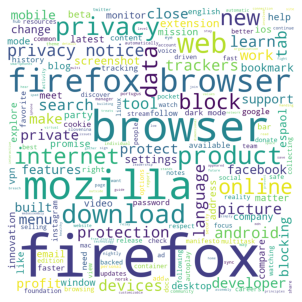

Number of URLs using findlinks: 88
https://www.google.com/chrome/browser/desktop/


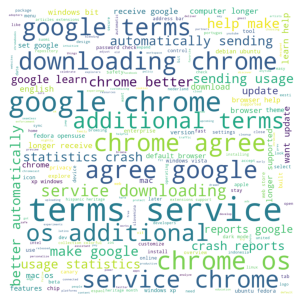

Number of URLs using findlinks: 17
http://www.apple.com/safari/


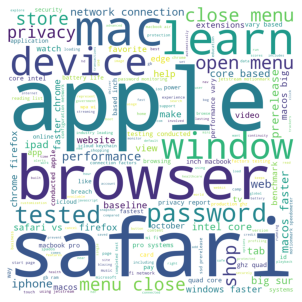

Number of URLs using findlinks: 109
https://www.medstargeorgetown.org/


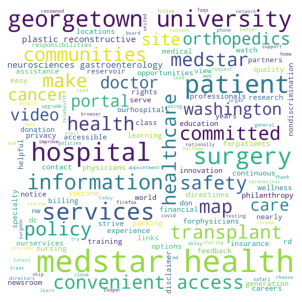

Number of URLs using findlinks: 117
https://www.medstargeorgetown.org/for-patients/


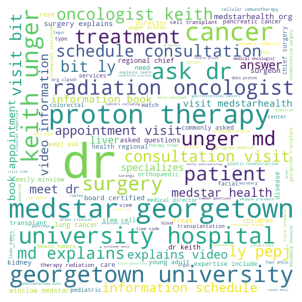

Number of URLs using findlinks: 129
https://www.medstargeorgetown.org/for-physicians/


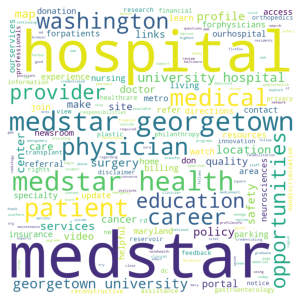

Number of URLs using findlinks: 210
https://www.medstargeorgetown.org/our-services/


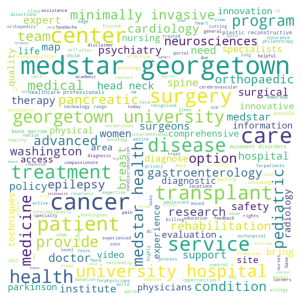

Number of URLs using findlinks: 112
https://www.medstargeorgetown.org/our-hospital/


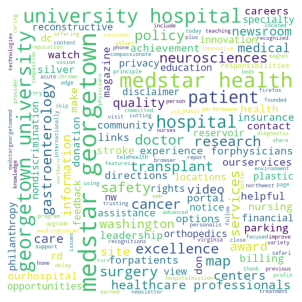

Number of URLs using findlinks: 117
https://www.medstargeorgetown.org/for-patients/


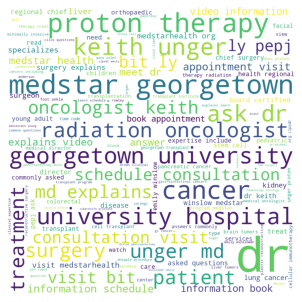

Number of URLs using findlinks: 129
https://www.medstargeorgetown.org/for-physicians/


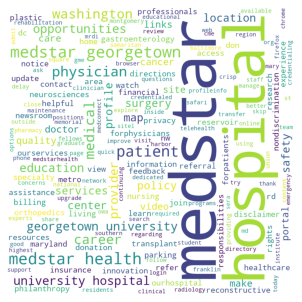

Number of URLs using findlinks: 210
https://www.medstargeorgetown.org/our-services/


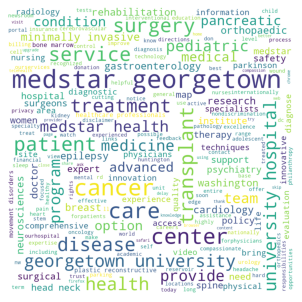

Number of URLs using findlinks: 112
https://www.medstargeorgetown.org/our-hospital/


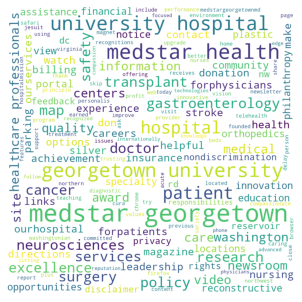

Number of URLs using findlinks: 155
https://www.medstarhealth.org/mhs/about-medstar/covid-19-info/


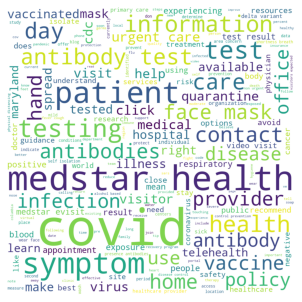

Number of URLs using findlinks: 128
https://www.medstarhealth.org/mhs/about-medstar/covid-19-vaccine-information/


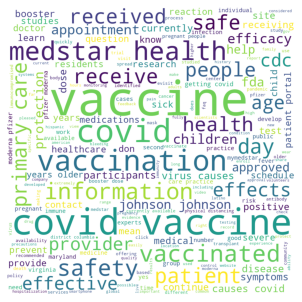

Number of URLs using findlinks: 117
https://www.medstarhealth.org/mhs/about-medstar/covid-19-testing/


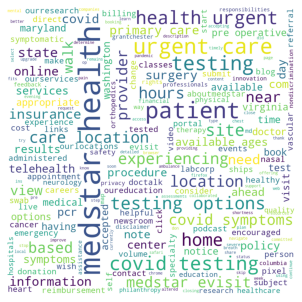

Number of URLs using findlinks: 98
https://www.medstarhealth.org/mhs/about-medstar/covid-19-info/visitor-policies-and-guidance-during-covid-19/


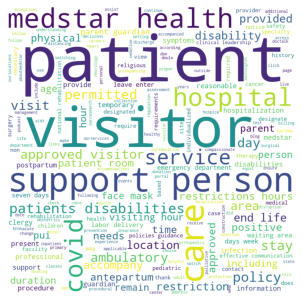

Number of URLs using findlinks: 109
https://www.medstarhealth.org/mhs/about-medstar/its-how-we-treat-people/


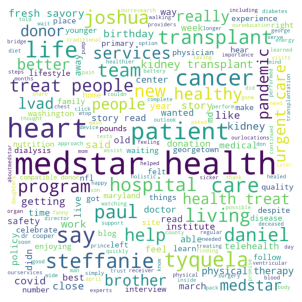

Number of URLs using findlinks: 99
https://www.medstargeorgetown.org/find-a-doc/


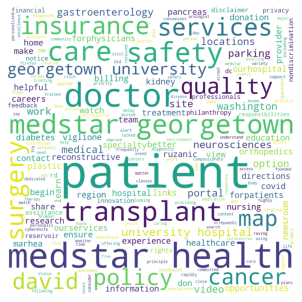

Number of URLs using findlinks: 155
https://www.medstarhealth.org/mhs/about-medstar/covid-19-info


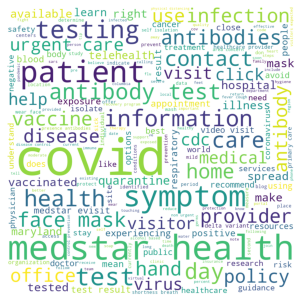

length of site_data 19


In [12]:
breakpt = 20
site_data = []
linkOfSites = "https://www.medstargeorgetown.org/"
link_list = findlinks(linkOfSites)
print("Number of links on site:" ,len(link_list))
x=1
for link in link_list:
    if x ==breakpt: break
    siteLinks = findlinks(link)
    siteText = cleanMe(link)
    tokens = tokenize(siteText)
    filename = 'wordcloud'+str(x)+'.png'
    if len(siteText)>1: create_cloud(tokens,link,filename)
    site_data.append([link,siteText,siteLinks,filename])
    x+=1
print("length of site_data", len(site_data) )   